In [2]:
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt

In [9]:
sample_number = 139

In [10]:
# Load and parse XML file
DATA_PATH = '/dtu/datasets1/02516/potholes'

tree = ET.parse(os.path.join(DATA_PATH, 'annotations', f'potholes{sample_number}.xml'))
root = tree.getroot()


# For each object, get bounding box coordinates
for obj in root.findall('object'):
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    print(f'Object bounding box: xmin={xmin}, xmax={xmax}, ymin={ymin}, ymax={ymax}')



Object bounding box: xmin=143, xmax=288, ymin=157, ymax=271
Object bounding box: xmin=368, xmax=400, ymin=120, ymax=149


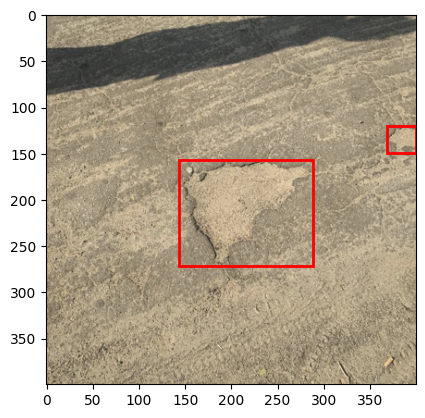

In [11]:
# Load and display image
img_path = os.path.join(DATA_PATH, 'images', f'potholes{sample_number}.png')
img = plt.imread(img_path)
plt.imshow(img)

# Plot bounding boxes on the image (optional)
for obj in root.findall('object'):
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    xmax = int(bndbox.find('xmax').text)
    ymin = int(bndbox.find('ymin').text)
    ymax = int(bndbox.find('ymax').text)
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                      fill=False, edgecolor='red', linewidth=2))